   Year  State  StateMinimumWage  FederalMinimumWage  EffectiveMinimumWage  \
0  1968      0           0.00000                1.15                  1.15   
1  1968      1           2.10000                1.15                  2.10   
2  1968      2           0.46800                1.15                  1.15   
3  1968      3           0.15625                1.15                  1.15   
4  1968      4           1.65000                1.15                  1.65   

   EffectiveMinimumWage2020Dollars  CPIAverage  FedFundsRate       Gdp  \
0                             8.55        34.8      5.659167  940.6465   
1                            15.61        34.8      5.659167  940.6465   
2                             8.55        34.8      5.659167  940.6465   
3                             8.55        34.8      5.659167  940.6465   
4                            12.26        34.8      5.659167  940.6465   

   HomePriceIndex  MortgageRate  PopulationGrowth  UnemploymentRate  
0             Na

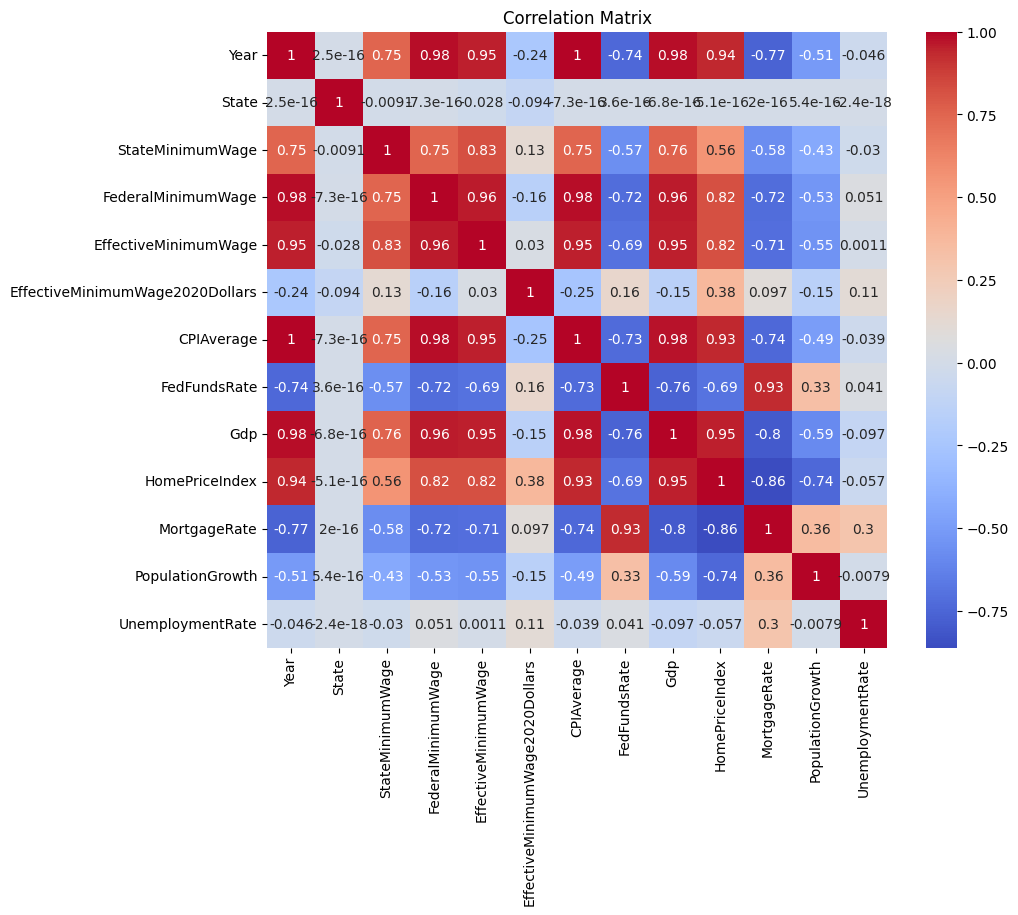

Highly correlated variables:
Year                  Year                    1.000000
                      CPIAverage              0.998557
FederalMinimumWage    Year                    0.982701
                      CPIAverage              0.982592
Gdp                   Year                    0.981545
CPIAverage            Gdp                     0.977198
FederalMinimumWage    Gdp                     0.963467
                      EffectiveMinimumWage    0.956504
EffectiveMinimumWage  Year                    0.953373
Gdp                   EffectiveMinimumWage    0.953157
HomePriceIndex        Gdp                     0.951578
CPIAverage            EffectiveMinimumWage    0.951096
Year                  HomePriceIndex          0.937696
HomePriceIndex        CPIAverage              0.934872
FedFundsRate          MortgageRate            0.931604
EffectiveMinimumWage  StateMinimumWage        0.825165
                      HomePriceIndex          0.823996
HomePriceIndex        FederalMinimum

In [1]:
import pandas as pd
# Importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt



# Load the dataset
df = pd.read_csv("FinalDataSet.csv")

# Perform EDA
# Summary statistics

# Label Encode State Column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

print(df.head())
summary_stats = df.head()
print(summary_stats)

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Find highly correlated variables
highly_correlated = correlation_matrix[correlation_matrix > 0.8]
highly_correlated = highly_correlated.unstack().sort_values(ascending=False).drop_duplicates()
print("Highly correlated variables:")
print(highly_correlated)

# Determine type of clustering
# You can use techniques like K-means clustering or hierarchical clustering
# to determine the type of clustering based on the dataset characteristics.
# However, without knowing the specific details of the dataset, it is not possible
# to provide a specific clustering algorithm recommendation.

# Additional EDA steps can be performed based on the specific requirements of the dataset.


In [2]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [4]:
df.head()

,Year,State,StateMinimumWage,FederalMinimumWage,EffectiveMinimumWage,EffectiveMinimumWage2020Dollars,CPIAverage,FedFundsRate,Gdp,HomePriceIndex,MortgageRate,PopulationGrowth,UnemploymentRate
0,1968,0,0.00000,1.15,1.15,8.55,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333
1,1968,1,2.10000,1.15,2.10,15.61,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333
2,1968,2,0.46800,1.15,1.15,8.55,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333
3,1968,3,0.15625,1.15,1.15,8.55,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333
4,1968,4,1.65000,1.15,1.65,12.26,34.8,5.659167,940.6465,NaN,NaN,0.998461,3.558333


In [5]:
df = df.interpolate(method='linear', limit_direction='forward', axis=1)


,Year,State,StateMinimumWage,FederalMinimumWage,EffectiveMinimumWage,EffectiveMinimumWage2020Dollars,CPIAverage,FedFundsRate,Gdp,HomePriceIndex,MortgageRate,PopulationGrowth,UnemploymentRate
0,1968.0,0.0,0.00000,1.15,1.15,8.55,34.8,5.659167,940.6465,627.430487,314.214474,0.998461,3.558333
1,1968.0,1.0,2.10000,1.15,2.10,15.61,34.8,5.659167,940.6465,627.430487,314.214474,0.998461,3.558333
2,1968.0,2.0,0.46800,1.15,1.15,8.55,34.8,5.659167,940.6465,627.430487,314.214474,0.998461,3.558333
3,1968.0,3.0,0.15625,1.15,1.15,8.55,34.8,5.659167,940.6465,627.430487,314.214474,0.998461,3.558333
4,1968.0,4.0,1.65000,1.15,1.65,12.26,34.8,5.659167,940.6465,627.430487,314.214474,0.998461,3.558333


In [18]:
models = []
accuracies = []
for i in range(0, len(df.columns)):
    X,y = df.drop(df.columns[i], axis=1), df[df.columns[i]]
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=0)
    # rfecv = RFECV(estimator=rf, step=1, cv=5)
    # rfecv.fit(X_train, y_train)
    rf.fit(X_train,y_train)
    # Calculate accuracy of rf model
    accuracies.append(rf.score(X_test, y_test))
    models.append(rf)
    
# X,y = df.drop('EffectiveMinimumWage', axis=1), df['EffectiveMinimumWage']
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=42)
# rf = RandomForestRegressor(random_state=0)

# rf.fit(X_train,y_train)
# f_i = list(zip(X.columns,rf.feature_importances_))
# f_i.sort(key = lambda x : x[1])
# plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [19]:
print(accuracies)

[0.9999998532938376, -0.06035386301575296, 0.9763656663743252, 0.9999985938261761, 0.9998800090270915, 0.9914946453848472, 0.9999996744514527, 0.9999806011533061, 0.9999999294548091, 0.9999996217586625, 0.9999999987684234, 0.999995591632659, 0.9999987514414752]


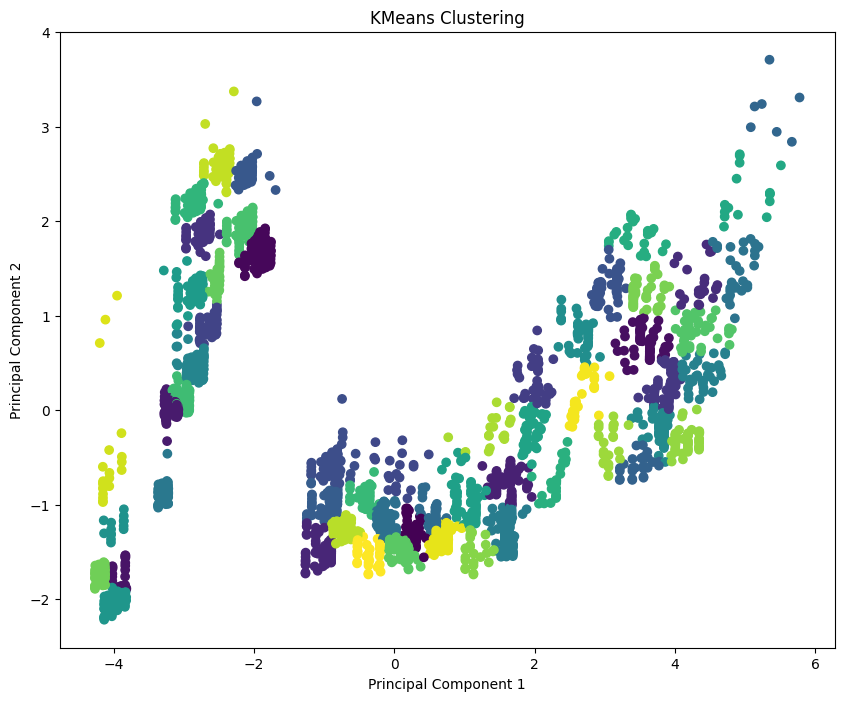

In [21]:
# Perform Clustering analysis and make a plot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA to reduce the dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=56, random_state=0)
clusters = kmeans.fit_predict(principal_components)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()

# Save the plot
# plt.savefig('clustering_plot.png')


